In [951]:
# Initial imports
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [952]:
file = '../Resources/2013_Expenditures_Contributions_Merge.csv'
IC_2013 = pd.read_csv(file,index_col=False)
IC_2013.head()

,Election,CandidateID,CandidateName,Date,ContributerType,City,State,ZipCode,Amount,MatchAmt,PrevAmt,TotalAmount,ExpenditureAmount,PurposeCode,Purpose
0,2013,1752,"Abiodun,Laurel-Smith",9/7/2013,Corporation,New York,NY,10001,0.0,0,0.0,0.0,54,Office Expenses,Office Expenses
1,2013,260,"William,Thompson, Jr.",1/17/2012,Corporation,New York,NY,10019,0.0,0,0.0,0.0,19,Other,Other: explntion
2,2013,FI,"John,Liu",7/12/2013,Limited Liability Company,Flushing,NY,11355,0.0,0,0.0,0.0,110,Office Expenses,Office Expenses
3,2013,FI,"John,Liu",4/15/2013,Limited Liability Company,Flushing,NY,11355,0.0,0,0.0,0.0,250,Fundraising,Fundraising
4,2013,260,"William,Thompson, Jr.",7/8/2013,Limited Liability Company,New York,NY,10018,0.0,0,0.0,0.0,57,Other,Other: explntion


In [953]:
IC_2013_df = IC_2013.drop(columns=['Election','PrevAmt'])
total_groupby = IC_2013_df.groupby(['CandidateName']).sum(['TotalAmount']).sort_values('TotalAmount',ascending=False)
total_groupby

,Amount,MatchAmt,TotalAmount,ExpenditureAmount
CandidateName,,,,
"de Blasio, Bill",11073226.59,926504,1.497036e+07,0
"Quinn, Christine C",6096021.97,527421,9.427039e+06,0
"Thompson, Jr., William C",4911412.70,417722,6.111452e+06,0
"Liu, John C",239200.00,0,4.045000e+05,0
"Weiner, Anthony D",225088.74,0,2.301887e+05,0
"Lhota, Joseph J",41414.00,0,4.141400e+04,0
"Albanese, Sal F",27178.00,0,3.092800e+04,0
"Hidary, Jack D",1500.00,0,2.500000e+03,0
"Salgado, Erick J",675.00,0,6.750000e+02,0


In [954]:
IC_2013_df = IC_2013_df.groupby(['ZipCode','Date','ContributerType','City','State']).sum('TotalAmount')

In [955]:
IC_2013_df.head()

Amount  MatchAmt  \
ZipCode Date       ContributerType City     State                     
00901   1/17/2012  Corporation     San Juan PR        0.0         0   
00907   10/24/2011 Corporation     San Juan PR        0.0         0   
        11/14/2011 Corporation     San Juan PR        0.0         0   
        11/7/2013  Corporation     San Juan PR        0.0         0   
        12/11/2013 Corporation     San Juan PR        0.0         0   

                                                   TotalAmount  \
ZipCode Date       ContributerType City     State                
00901   1/17/2012  Corporation     San Juan PR             0.0   
00907   10/24/2011 Corporation     San Juan PR             0.0   
        11/14/2011 Corporation     San Juan PR             0.0   
        11/7/2013  Corporation     San Juan PR             0.0   
        12/11/2013 Corporation     San Juan PR             0.0   

                                                   ExpenditureAmount  
ZipCode Date       ContributerType City     State                     
00901   1/17/2012  Corporation     San Juan PR                   644  
00907   10/24/2011 Corporation     San Juan PR                   186  
        11/14/2011 Corporation     San Juan PR                   188  
        11/7/2013  Corporation     San Juan PR                  1281  
        12/11/2013 Corporation     San Juan PR                  -256

In [956]:
IC_2013_df = IC_2013_df.reset_index()
IC_2013_df

,ZipCode,Date,ContributerType,City,State,Amount,MatchAmt,TotalAmount,ExpenditureAmount
0,00901,1/17/2012,Corporation,San Juan,PR,0.0,0,0.0,644
1,00907,10/24/2011,Corporation,San Juan,PR,0.0,0,0.0,186
2,00907,11/14/2011,Corporation,San Juan,PR,0.0,0,0.0,188
3,00907,11/7/2013,Corporation,San Juan,PR,0.0,0,0.0,1281
4,00907,12/11/2013,Corporation,San Juan,PR,0.0,0,0.0,-256
...,...,...,...,...,...,...,...,...,...
29205,M6K3C,6/3/2013,Corporation,Toronto,ON,0.0,0,0.0,29
29206,M6K3C,7/1/2013,Corporation,Toronto,ON,0.0,0,0.0,29
29207,M6K3C,8/1/2013,Corporation,Toronto,ON,0.0,0,0.0,29
29208,M6K3C,9/4/2013,Corporation,Toronto,ON,0.0,0,0.0,29


In [957]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2
IC_2013_df_enc = IC_2013_df.copy()
le = LabelEncoder()
IC_2013_df_enc['Date'] = le.fit_transform(IC_2013_df['Date'])
IC_2013_df_enc['ContributerType'] = le.fit_transform(IC_2013_df['ContributerType'])
IC_2013_df_enc['City'] = le.fit_transform(IC_2013_df['City'])
# IC_2013_df_enc['Amount'] = le.fit_transform(IC_2013_df['Amount'])
IC_2013_df_enc['State'] = le.fit_transform(IC_2013_df['State'])
IC_2013_df_enc['ZipCode'] = le.fit_transform(IC_2013_df['ZipCode'])
# IC_2013_df_enc['MatchAmt'] = le.fit_transform(IC_2013_df['MatchAmt'])
# IC_2013_df_enc[features] = scaler.fit_transform(IC_2013_df_enc[features])
IC_2013_df_enc.head()

,ZipCode,Date,ContributerType,City,State,Amount,MatchAmt,TotalAmount,ExpenditureAmount
0,0,30,4,1576,60,0.0,0,0.0,644
1,1,182,4,1576,60,0.0,0,0.0,186
2,1,259,4,1576,60,0.0,0,0.0,188
3,1,339,4,1576,60,0.0,0,0.0,1281
4,1,362,4,1576,60,0.0,0,0.0,-256


In [958]:

X = IC_2013_df_enc.drop('TotalAmount',axis = 1)
y = IC_2013_df_enc['TotalAmount']
IC_2013_df_enc.nunique()

ZipCode              2516
Date                 1450
ContributerType        12
City                 2015
State                  90
Amount                919
MatchAmt              286
TotalAmount          1274
ExpenditureAmount    2239
dtype: int64

In [959]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=79)

In [960]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [961]:
regr = RandomForestRegressor()

In [962]:
regr.fit(X_train, y_train)

RandomForestRegressor()

In [963]:
y_pred = regr.predict(X_test)
print(len(y_pred))

8763


In [964]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)

0.8515688531476237


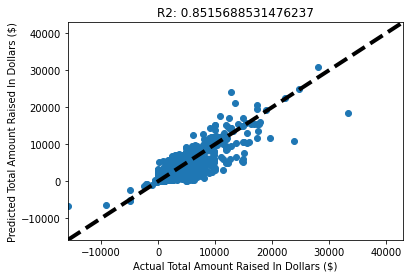

In [965]:
# %matplotlib inline
print(r_squared)
# fig, ax = plt.subplots()
# ax.scatter(y_test,y_pred)
# ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
# ax.set_xlabel('Actual Total Amount Raised In Dollars ($)')
# ax.set_ylabel('Predicted Total Amount Raised In Dollars ($)')
# ax.set_title('R2: ' + str(r2_score(y_test, y_pred)))
plt.scatter(y_test,y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual Total Amount Raised In Dollars ($)')
plt.ylabel('Predicted Total Amount Raised In Dollars ($)')
plt.title('R2: ' + str(r2_score(y_test, y_pred)))
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.savefig('..ResourcesPredicted_Total_Amount_Regression.png')

In [966]:
pred_df = X_test
pred_df['Predicted Total Amount'] = y_pred
# pred_df.groupby('ZipCode').sum('Predicted Total Amount').head()

/Users/Abir/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [967]:
pred_df.isnull().sum()

ZipCode                   0
Date                      0
ContributerType           0
City                      0
State                     0
Amount                    0
MatchAmt                  0
ExpenditureAmount         0
Predicted Total Amount    0
dtype: int64

In [968]:
pred_graph = pred_df.groupby('zipcode').sum('redicted Total Amount').sort_values(by=['Predicted Total Amount'],ascending=True)

KeyError: 'zipcode'

In [ ]:
# pred_graph = pred_graph.reset_index()
pred_graph

In [ ]:
pred_graph.to_csv('../Resources/Predicted_Amounts.csv',index=False)